In [ ]:
! pip install XGboost
! pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 29.3 MB/s 
     |████████████████████████████████| 133 kB 8.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=c0279e06dfd01941b25b41aa2cba8548ea180ed5b2f95a0734d00aa8ea3663ef
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which 

In [ ]:
from xgboost import XGBClassifier
import eli5
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['target'] = data.target

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
x = df.drop(['target'],axis=1)
y = df.target

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model = XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier()

In [ ]:
y_pred = model.predict(x_test)

classification report :               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Test  Accuracy : 0.96
Train Accuracy : 1.00
accuracy: 0.9649122807017544
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


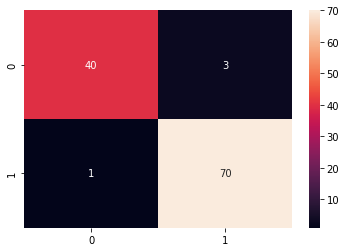

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_test,y_pred)
print("classification report :", clf_rpt)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
print("Test  Accuracy : %.2f"%model.score(x_test, y_test))
print("Train Accuracy : %.2f"%model.score(x_train, y_train))
print("accuracy:",metrics.accuracy_score(y_test,y_pred))
%time


In [ ]:
eli5.show_weights(model, top=50)

Weight,Feature
0.3622,mean concave points
0.2044,worst concave points
0.1024,worst perimeter
0.0597,worst radius
0.0307,worst area
0.0281,worst texture
0.0230,mean texture
0.0226,worst concavity
0.0193,mean area
0.0192,concavity error


In [ ]:
df_xg = df[['mean concave points','worst concave points','worst perimeter','worst radius','worst area','worst texture','mean texture','worst concavity','mean area','concavity error','target']].copy()

In [ ]:
df_xg.shape

(569, 11)

In [ ]:
df_xg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean concave points   569 non-null    float64
 1   worst concave points  569 non-null    float64
 2   worst perimeter       569 non-null    float64
 3   worst radius          569 non-null    float64
 4   worst area            569 non-null    float64
 5   worst texture         569 non-null    float64
 6   mean texture          569 non-null    float64
 7   worst concavity       569 non-null    float64
 8   mean area             569 non-null    float64
 9   concavity error       569 non-null    float64
 10  target                569 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 49.0 KB


In [ ]:
x_xg = df_xg.drop(['target'],axis=1)
y_xg = df_xg.target

In [ ]:
x_xg_train,x_xg_test, y_xg_train,y_xg_test = train_test_split(x_xg,y_xg,test_size=0.2,random_state=42)

In [ ]:
model_xg = XGBClassifier()
model_xg.fit(x_xg_train,y_xg_train)

XGBClassifier()

In [ ]:
y_xg_pred = model_xg.predict(x_xg_test)

classification report :               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Test  Accuracy : 0.96
Train Accuracy : 1.00
accuracy: 0.9649122807017544
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 4.77 µs


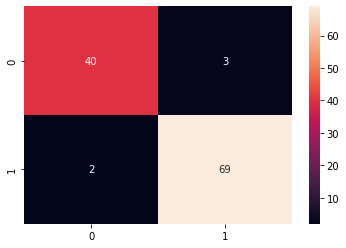

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
clf_rpt_xg = classification_report(y_xg_test,y_xg_pred)
print("classification report :", clf_rpt_xg)
cm_xg = confusion_matrix(y_xg_test, y_xg_pred)
sns.heatmap(cm_xg,annot=True)
print("Test  Accuracy : %.2f"%model_xg.score(x_xg_test, y_xg_test))
print("Train Accuracy : %.2f"%model_xg.score(x_xg_train, y_xg_train))
print("accuracy:",metrics.accuracy_score(y_test,y_pred))
%time

In [ ]:
eli5.show_weights(model_xg)

Weight,Feature
0.3441,mean concave points
0.2318,worst concave points
0.1462,worst perimeter
0.1041,worst radius
0.0433,worst area
0.0426,worst texture
0.0288,worst concavity
0.0246,mean texture
0.0208,mean area
0.0137,concavity error


9 FEATURES ONLY

TOOK OUT CONCAVITY ERROR

In [ ]:
df_xg_9= df[['mean concave points','worst concave points','worst perimeter','worst radius','worst area','worst texture','mean texture','worst concavity','mean area','target']].copy()

classification report :               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Test  Accuracy : 0.96
Train Accuracy : 1.00
accuracy: 0.956140350877193
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 5.01 µs


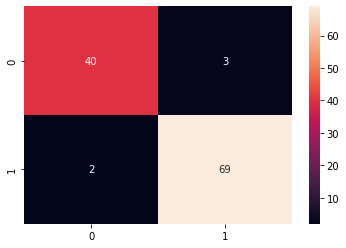

In [ ]:
x_xg_9 = df_xg_9.drop(['target'],axis=1)
y_xg_9 = df_xg_9.target
x_xg_9_train,x_xg_9_test, y_xg_9_train,y_xg_9_test = train_test_split(x_xg_9,y_xg_9,test_size=0.2,random_state=42)
model_xg_9 = XGBClassifier()
model_xg_9.fit(x_xg_9_train,y_xg_9_train)
y_xg_9_pred = model_xg_9.predict(x_xg_9_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
clf_rpt_xg_9 = classification_report(y_xg_9_test,y_xg_9_pred)
print("classification report :", clf_rpt_xg_9)
cm_xg_9 = confusion_matrix(y_xg_9_test, y_xg_9_pred)
sns.heatmap(cm_xg_9,annot=True)
print("Test  Accuracy : %.2f"%model_xg_9.score(x_xg_9_test, y_xg_9_test))
print("Train Accuracy : %.2f"%model_xg_9.score(x_xg_9_train, y_xg_9_train))
print("accuracy:",metrics.accuracy_score(y_xg_9_test,y_xg_9_pred))
%time

In [ ]:
eli5.show_weights(model_xg_9)

Weight,Feature
0.3840,mean concave points
0.2385,worst concave points
0.1256,worst perimeter
0.0840,worst radius
0.0476,worst area
0.0467,worst texture
0.0283,mean texture
0.0254,worst concavity
0.0199,mean area


In [ ]:
from sklearn.metrics import roc_auc_score
svm_up_9_auc = roc_auc_score(y_xg_9_test, y_xg_9_pred)
print(svm_up_9_auc)

0.9510317720275139


8 FEATURES 

TOOK OUT CONCAVITY ERROR AND MEAN AREA

In [ ]:
df_xg_8= df[['mean concave points','worst concave points','worst perimeter','worst radius','worst area','worst texture','mean texture','worst concavity','target']].copy()

classification report :               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Test  Accuracy : 0.95
Train Accuracy : 1.00
accuracy: 0.9473684210526315
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 5.01 µs


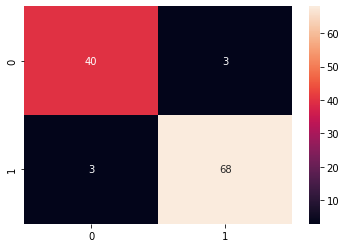

In [ ]:
x_xg_8 = df_xg_8.drop(['target'],axis=1)
y_xg_8 = df_xg_8.target
x_xg_8_train,x_xg_8_test, y_xg_8_train,y_xg_8_test = train_test_split(x_xg_8,y_xg_8,test_size=0.2,random_state=42)
model_xg_8 = XGBClassifier()
model_xg_8.fit(x_xg_8_train,y_xg_8_train)
y_xg_8_pred = model_xg_8.predict(x_xg_8_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
clf_rpt_xg_8 = classification_report(y_xg_8_test,y_xg_8_pred)
print("classification report :", clf_rpt_xg_8)
cm_xg_8 = confusion_matrix(y_xg_8_test, y_xg_8_pred)
sns.heatmap(cm_xg_8,annot=True)
print("Test  Accuracy : %.2f"%model_xg_8.score(x_xg_8_test, y_xg_8_test))
print("Train Accuracy : %.2f"%model_xg_8.score(x_xg_8_train, y_xg_8_train))
print("accuracy:",metrics.accuracy_score(y_xg_8_test,y_xg_8_pred))
%time




In [ ]:
xg_up_8_auc = roc_auc_score(y_xg_8_test, y_xg_8_pred)
print(xg_up_8_auc)

0.9439895185063871


In [ ]:
eli5.show_weights(model_xg_8)

Weight,Feature
0.3915,mean concave points
0.2341,worst concave points
0.1153,worst perimeter
0.0982,worst radius
0.0518,worst area
0.0516,worst texture
0.0309,mean texture
0.0267,worst concavity


TOOK OUT CONCAVITY ERROR, MEAN AREA and worst concavity

In [ ]:
df_xg_7= df[['mean concave points','worst concave points','worst perimeter','worst radius','worst area','worst texture','mean texture','target']].copy()

classification report :               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Test  Accuracy : 0.96
Train Accuracy : 0.99
accuracy: 0.956140350877193
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 5.48 µs


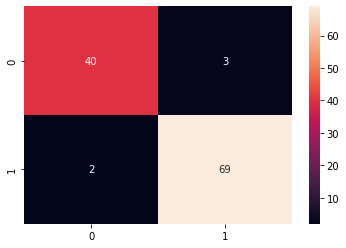

In [ ]:
x_xg_7 = df_xg_7.drop(['target'],axis=1)
y_xg_7 = df_xg_7.target
x_xg_7_train,x_xg_7_test, y_xg_7_train,y_xg_7_test = train_test_split(x_xg_7,y_xg_7,test_size=0.2,random_state=42)
model_xg_7 = XGBClassifier()
model_xg_7.fit(x_xg_7_train,y_xg_7_train)
y_xg_7_pred = model_xg_7.predict(x_xg_7_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
clf_rpt_xg_7 = classification_report(y_xg_7_test,y_xg_7_pred)
print("classification report :", clf_rpt_xg_7)
cm_xg_7 = confusion_matrix(y_xg_7_test, y_xg_7_pred)
sns.heatmap(cm_xg_7,annot=True)
print("Test  Accuracy : %.2f"%model_xg_7.score(x_xg_7_test, y_xg_7_test))
print("Train Accuracy : %.2f"%model_xg_7.score(x_xg_7_train, y_xg_7_train))
print("accuracy:",metrics.accuracy_score(y_xg_7_test,y_xg_7_pred))
%time

In [ ]:
eli5.show_weights(model_xg_7)

Weight,Feature
0.4044,mean concave points
0.1743,worst concave points
0.1245,worst perimeter
0.1157,worst radius
0.0806,worst area
0.0619,worst texture
0.0385,mean texture


In [ ]:
df_xg_6= df[['mean concave points','worst concave points','worst perimeter','worst radius','worst area','worst texture','target']].copy()

classification report :               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Test  Accuracy : 0.96
Train Accuracy : 1.00
accuracy: 0.956140350877193
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 4.77 µs


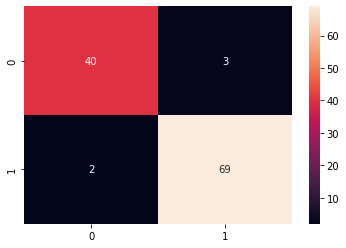

In [ ]:
x_xg_6 = df_xg_6.drop(['target'],axis=1)
y_xg_6 = df_xg_6.target
x_xg_6_train,x_xg_6_test, y_xg_6_train,y_xg_6_test = train_test_split(x_xg_6,y_xg_6,test_size=0.2,random_state=42)
model_xg_6 = XGBClassifier()
model_xg_6.fit(x_xg_6_train,y_xg_6_train)
y_xg_6_pred = model_xg_6.predict(x_xg_6_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
clf_rpt_xg_6 = classification_report(y_xg_6_test,y_xg_6_pred)
print("classification report :", clf_rpt_xg_6)
cm_xg_6 = confusion_matrix(y_xg_6_test, y_xg_6_pred)
sns.heatmap(cm_xg_6,annot=True)
print("Test  Accuracy : %.2f"%model_xg_6.score(x_xg_6_test, y_xg_6_test))
print("Train Accuracy : %.2f"%model_xg_6.score(x_xg_6_train, y_xg_6_train))
print("accuracy:",metrics.accuracy_score(y_xg_6_test,y_xg_6_pred))
%time

In [ ]:
eli5.show_weights(model_xg_6)

Weight,Feature
0.4081,mean concave points
0.1854,worst concave points
0.1511,worst perimeter
0.1028,worst radius
0.0871,worst area
0.0656,worst texture


In [ ]:
df_xg_5= df[['mean concave points','worst concave points','worst perimeter','worst radius','worst area','target']].copy()

classification report :               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Test  Accuracy : 0.96
Train Accuracy : 0.98
accuracy: 0.956140350877193
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 5.25 µs


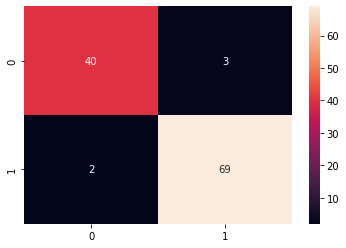

In [ ]:
x_xg_5 = df_xg_5.drop(['target'],axis=1)
y_xg_5 = df_xg_5.target
x_xg_5_train,x_xg_5_test, y_xg_5_train,y_xg_5_test = train_test_split(x_xg_5,y_xg_5,test_size=0.2,random_state=42)
model_xg_5 = XGBClassifier()
model_xg_5.fit(x_xg_5_train,y_xg_5_train)
y_xg_5_pred = model_xg_5.predict(x_xg_5_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
clf_rpt_xg_5 = classification_report(y_xg_5_test,y_xg_5_pred)
print("classification report :", clf_rpt_xg_5)
cm_xg_5 = confusion_matrix(y_xg_5_test, y_xg_5_pred)
sns.heatmap(cm_xg_5,annot=True)
print("Test  Accuracy : %.2f"%model_xg_5.score(x_xg_5_test, y_xg_5_test))
print("Train Accuracy : %.2f"%model_xg_5.score(x_xg_5_train, y_xg_5_train))
print("accuracy:",metrics.accuracy_score(y_xg_5_test,y_xg_5_pred))
%time

In [ ]:
eli5.show_weights(model_xg_5)

Weight,Feature
0.4317,mean concave points
0.2512,worst concave points
0.1181,worst radius
0.1077,worst area
0.0914,worst perimeter


# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train, y_train)
y_lr_pred = lr.predict(x_test)
print("Test  Accuracy : %.2f"%lr.score(x_test, y_test))
print("Train Accuracy : %.2f"%lr.score(x_train, y_train))
print()
print("Confusion Matrix : ")
print(confusion_matrix(y_test, lr.predict(x_test)))
print()
print("Classification Report")
print(classification_report(y_test, lr.predict(x_test)))
print("accuracy:",metrics.accuracy_score(y_test,y_pred))
%time

Test  Accuracy : 0.96
Train Accuracy : 0.95

Confusion Matrix : 
[[40  3]
 [ 1 70]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

accuracy: 0.9649122807017544
CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 5.48 µs


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
eli5.show_weights(lr,
             targets=[0,1], target_names=data.target_names,
             feature_names=data.feature_names,
             top=len(data.feature_names)+1)

Weight?,Feature
+1.336,worst radius
+1.271,mean radius
+0.556,texture error
+0.531,mean texture
+0.242,<BIAS>
+0.097,mean perimeter
+0.052,perimeter error
+0.044,radius error
-0.004,fractal dimension error
-0.005,smoothness error


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_xg_train, y_xg_train)
y3_pred = lr.predict(x_xg_test)
print("Test  Accuracy : %.2f"%lr.score(x_xg_test, y_xg_test))
print("Train Accuracy : %.2f"%lr.score(x_xg_train, y_xg_train))
print()
print("Confusion Matrix : ")
print(confusion_matrix(y_xg_test, lr.predict(x_xg_test)))
print()
print("Classification Report")
print(classification_report(y_xg_test, lr.predict(x_xg_test)))
print("accuracy:",metrics.accuracy_score(y_xg_test,y3_pred))
%time

Test  Accuracy : 0.95
Train Accuracy : 0.95

Confusion Matrix : 
[[38  5]
 [ 1 70]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.99      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

accuracy: 0.9473684210526315
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train, y_train)
y_rf_pred = rf.predict(x_test)
print("Test  Accuracy : %.2f"%rf.score(x_test, y_test))
print("Train Accuracy : %.2f"%rf.score(x_train, y_train))
print()
print("Confusion Matrix : ")
print(confusion_matrix(y_test, rf.predict(x_test)))
print()
print("Classification Report")
print(classification_report(y_test, rf.predict(x_test)))
print("Accuracy:",metrics.accuracy_score(y_test, y_rf_pred))
%time

Test  Accuracy : 0.96
Train Accuracy : 1.00

Confusion Matrix : 
[[40  3]
 [ 1 70]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy: 0.9649122807017544
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


In [ ]:
eli5.show_weights(rf,
             targets=[0, 1], target_names=data.target_names,
             feature_names=data.feature_names,
             top=len(data.feature_names)+1)

Weight,Feature
0.1756 ± 0.5654,worst radius
0.1165 ± 0.4397,worst concave points
0.1107 ± 0.4374,worst perimeter
0.0965 ± 0.4261,mean concave points
0.0940 ± 0.4233,worst area
0.0420 ± 0.2141,worst concavity
0.0418 ± 0.2695,mean area
0.0411 ± 0.2477,area error
0.0316 ± 0.2247,mean perimeter
0.0308 ± 0.2173,mean radius


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_xg = RandomForestClassifier()

rf_xg.fit(x_xg_train, y_xg_train)
y_rf_pred_xg = rf_xg.predict(x_xg_test)
print("Test  Accuracy : %.2f"%rf_xg.score(x_xg_test, y_xg_test))
print("Train Accuracy : %.2f"%rf_xg.score(x_xg_train, y_xg_train))
print()
print("Confusion Matrix : ")
print(confusion_matrix(y_xg_test, rf_xg.predict(x_xg_test)))
print()
print("Classification Report")
print(classification_report(y_xg_test, rf_xg.predict(x_xg_test)))
print("Accuracy:",metrics.accuracy_score(y_xg_test, y_rf_pred_xg))
%time

Test  Accuracy : 0.96
Train Accuracy : 1.00

Confusion Matrix : 
[[40  3]
 [ 2 69]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.956140350877193
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.81 µs


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_svm_pred = clf.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_svm_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_svm_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_svm_pred))

print("Test  Accuracy : %.2f"%clf.score(x_test, y_test))
print("Train Accuracy : %.2f"%clf.score(x_train, y_train))
print()
print("Confusion Matrix : ")
print(confusion_matrix(y_test, clf.predict(x_test)))
print()
print("Classification Report")
print(classification_report(y_test, clf.predict(x_test)))
%time

Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
Test  Accuracy : 0.96
Train Accuracy : 0.97

Confusion Matrix : 
[[39  4]
 [ 1 70]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:

lr_up_auc = roc_auc_score(y_test,y3_pred)
xg_up_auc = roc_auc_score(y_test,y_xg_pred)

In [ ]:

print(lr_up_auc)
print(xg_up_auc)

0.9348182115951523
0.9510317720275139


In [ ]:

lr_auc = roc_auc_score(y_test,y_lr_pred)
xg_auc = roc_auc_score(y_test,y_xg_pred)

In [ ]:

print(lr_auc)
print(xg_auc)

0.9580740255486406
0.9510317720275139
